In [225]:
# Name: Afzal Farooque
# Email: siddique992@gmail.com
# Mobile: +917007294342
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [226]:
b = webdriver.Chrome()
b.get("https://www.iexindia.com/marketdata/areaprice.aspx")

In [227]:
b.find_element_by_xpath('/html/body/form/div[3]/section[2]/div/div/div/div[1]/div[1]/label[2]/select/option[4]').click()

In [228]:
b.find_element_by_xpath('/html/body/form/div[3]/section[2]/div/div/div/center/input').click()

In [229]:
p = b.find_element_by_xpath('/html/body/form/div[3]/section[2]/div/div/div/span[3]/div/table/tbody/tr[4]/td/div/div/div[4]/table/tbody/tr/td/div[2]/div[1]/a')

In [230]:
# This step Downloads the excel file for Last 8 Days Area Price of 15 minute interval
b.execute_script("arguments[0].click();", p)

In [328]:
# path to the file saved from above script
df = pd.read_excel("/path/to/saved/excel/file")

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   20 non-null     object
 1   Unnamed: 1   240 non-null    object
 2   Unnamed: 2   768 non-null    object
 3   Unnamed: 3   818 non-null    object
 4   Unnamed: 4   818 non-null    object
 5   Unnamed: 5   818 non-null    object
 6   Unnamed: 6   818 non-null    object
 7   Unnamed: 7   818 non-null    object
 8   Unnamed: 8   818 non-null    object
 9   Unnamed: 9   818 non-null    object
 10  Unnamed: 10  818 non-null    object
 11  Unnamed: 11  818 non-null    object
 12  Unnamed: 12  818 non-null    object
 13  Unnamed: 13  818 non-null    object
 14  Unnamed: 14  818 non-null    object
 15  Unnamed: 15  818 non-null    object
 16  Unnamed: 16  818 non-null    object
dtypes: object(17)
memory usage: 109.2+ KB


In [330]:
df["Unnamed: 1"].loc[2] = "Hour"
df["Unnamed: 0"].loc[2] = "Date"
df["Unnamed: 2"].loc[2] = "Time Block"

In [331]:
# last rows to delete
ind = [i for i in range(771,821)]
df.drop(index=[*ind], inplace=True)

In [332]:
df.drop(index=0, inplace=True)
df.drop(index=1, inplace=True)

In [333]:
df.columns = df.loc[2]

In [334]:
df.drop(index=2, inplace=True)
df.reset_index(inplace=True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       768 non-null    int64 
 1   Date        8 non-null      object
 2   Hour        192 non-null    object
 3   Time Block  768 non-null    object
 4   A1          768 non-null    object
 5   A2          768 non-null    object
 6   E1          768 non-null    object
 7   E2          768 non-null    object
 8   N1          768 non-null    object
 9   N2          768 non-null    object
 10  N3          768 non-null    object
 11  S1          768 non-null    object
 12  S2          768 non-null    object
 13  S3          768 non-null    object
 14  W1          768 non-null    object
 15  W2          768 non-null    object
 16  W3          768 non-null    object
 17  MCP         768 non-null    object
dtypes: int64(1), object(17)
memory usage: 108.1+ KB


In [336]:
df.drop(columns=['index'], inplace=True)

In [337]:
df.isna().sum()

2
Date          760
Hour          576
Time Block      0
A1              0
A2              0
E1              0
E2              0
N1              0
N2              0
N3              0
S1              0
S2              0
S3              0
W1              0
W2              0
W3              0
MCP             0
dtype: int64

In [338]:
df.fillna(method='ffill', inplace=True)

In [339]:
df.iloc[95, 0:3]

2
Date             13-11-2020
Hour                     24
Time Block    23:45 - 24:00
Name: 95, dtype: object

In [340]:
new = df["Time Block"].str.split("-", n = 1, expand = True)
df['Date'] = df['Date'] + ' ' + new[0]

In [341]:
df['Date'] = df['Date'].str.strip()

In [342]:
df

2,Date,Hour,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,13-11-2020 00:00,1,00:00 - 00:15,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45
1,13-11-2020 00:15,1,00:15 - 00:30,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06
2,13-11-2020 00:30,1,00:30 - 00:45,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32
3,13-11-2020 00:45,1,00:45 - 01:00,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02
4,13-11-2020 01:00,2,01:00 - 01:15,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,20-11-2020 22:45,23,22:45 - 23:00,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32
764,20-11-2020 23:00,24,23:00 - 23:15,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38
765,20-11-2020 23:15,24,23:15 - 23:30,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62
766,20-11-2020 23:30,24,23:30 - 23:45,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33


In [343]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')

In [353]:
df['Date'].astype('O')

0      2020-11-13 00:00:00
1      2020-11-13 00:15:00
2      2020-11-13 00:30:00
3      2020-11-13 00:45:00
4      2020-11-13 01:00:00
              ...         
763    2020-11-20 22:45:00
764    2020-11-20 23:00:00
765    2020-11-20 23:15:00
766    2020-11-20 23:30:00
767    2020-11-20 23:45:00
Name: Date, Length: 768, dtype: object

In [345]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

In [278]:
df.columns[3:17]

Index(['A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1', 'S2', 'S3', 'W1', 'W2',
       'W3', 'MCP'],
      dtype='object', name=2)

<ipython-input-376-02124d766cbd>:22: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=8)


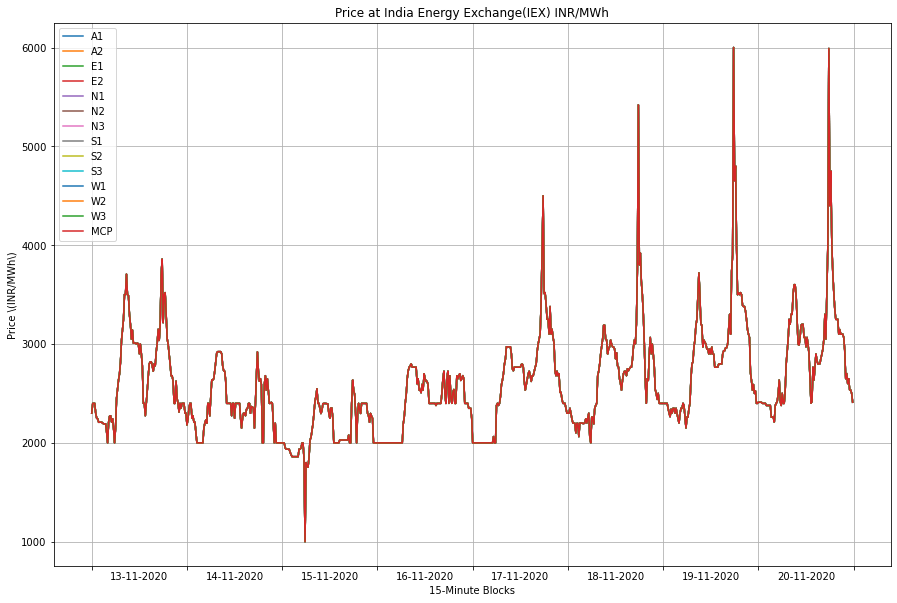

In [376]:
#plotting all the fields of market data

plt.figure(figsize=[15,10])
plt.grid(True)
for col in df.columns[3:17]:
    plt.plot(df['Date'], df[col].astype(float), label=col)
    
ax = plt.gca()
ax.xaxis.set_major_locator(dates.AutoDateLocator())
ax.xaxis.set_minor_locator(dates.HourLocator(byhour=12))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d-%m-%Y'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

plt.xlabel("15-Minute Blocks")
plt.ylabel("Price \(INR/MWh\)")
plt.locator_params(axis='x', nbins=8)
plt.title("Price at India Energy Exchange(IEX) INR/MWh")
plt.legend(loc=2)

In [354]:
#fitting moving average
df['A1_SMA_4'] = df.iloc[:,3].astype(float).rolling(window=4).mean()

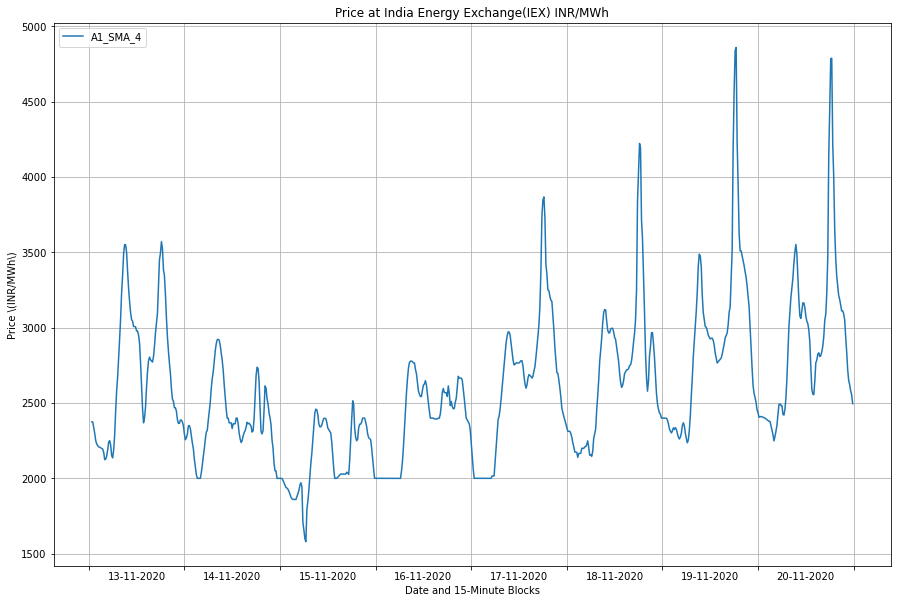

In [374]:
#plot 'A1' after fitting on moving average
plt.figure(figsize=[15,10])
plt.grid(True)

plt.plot(df['Date'], df['A1_SMA_4'], label='A1_SMA_4')

ax = plt.gca()
ax.xaxis.set_major_locator(dates.AutoDateLocator())
ax.xaxis.set_minor_locator(dates.HourLocator(byhour=12))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d-%m-%Y'))

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

plt.xlabel("Date and 15-Minute Blocks")
plt.ylabel("Price \(INR/MWh\)")
plt.title("Price at India Energy Exchange(IEX) INR/MWh")
plt.legend(loc=2)

In [284]:
import datetime

In [287]:
datetime.datetime.strptime('13-11-2020 00:00', '%d-%m-%Y %H:%M')

datetime.datetime(2020, 11, 13, 0, 0)